In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

# 1. Preparation

In [2]:
NL_c = 0.01
NL_t = 0.4
NL_nu= 0.3034496449165134
NL_L = 1.8

alfx = np.tan(np.pi*NL_nu)
betx = NL_L/np.sin(2.0*np.pi*NL_nu)
print(betx,alfx)

npt_Test = 3834

1.9065054393933862 1.4082261727304293


In [3]:
beam, lattice = impact.readInputFile('test_IOTA.in')
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
def normalize(data):
    data[:,1] = (data[:,0]*alfx/np.sqrt(betx) + data[:,1]*np.sqrt(betx))/NL_c
    data[:,3] = (data[:,2]*alfx/np.sqrt(betx) + data[:,3]*np.sqrt(betx))/NL_c
    data[:,0] = data[:,0]/(np.sqrt(betx)*NL_c)
    data[:,2] = data[:,2]/(np.sqrt(betx)*NL_c)
    
def unnormalize(data):
    data[:,1] = (-data[:,0]*alfx + data[:,1])*NL_c/np.sqrt(betx)
    data[:,3] = (-data[:,2]*alfx + data[:,3])*NL_c/np.sqrt(betx)
    data[:,0] = data[:,0]*np.sqrt(betx)*NL_c
    data[:,2] = data[:,2]*np.sqrt(betx)*NL_c

In [5]:
pData0 = impact.readParticleData(111110,ke,mass,freq,2)
ind = pData0[:,-1] > npt_Test
pData0 = pData0[ind,:]
normalize(pData0)
pData0[0,-1]

3835.0

In [6]:
pData128 = impact.readParticleData(128,ke,mass,freq,2)
ind = pData128[:,-1] > npt_Test
pData128 = pData128[ind,:]
normalize(pData128)
pData128[0,-1]

3835.0

In [7]:
pData256 = impact.readParticleData(256,ke,mass,freq,2)
ind = pData256[:,-1] > npt_Test
pData256 = pData256[ind,:]
normalize(pData256)
pData256[0,-1]

3835.0

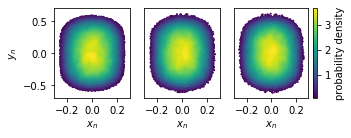

In [9]:
f, axs = plt.subplots(1,3,figsize=(5,2), gridspec_kw={'width_ratios': [0.9,0.9,1.1]})
f1=impact.plot.density(pData0[::10,0],pData0[::10,2],pltHandle=axs[0])
axs[0].set_xlim([-0.3,0.3])
axs[0].set_ylim([-0.7,0.7])
axs[0].set_xlabel(r'$x_n$')
axs[0].set_ylabel(r'$y_n$')
axs[0].set_xticks([-0.2,0.0,0.2]);
f2=impact.plot.density(pData128[::10,0],pData128[::10,2],pltHandle=axs[1])
axs[1].set_xlim([-0.3,0.3])
axs[1].set_ylim([-0.7,0.7])
axs[1].set_xlabel(r'$x_n$')
axs[1].set_yticks([]);
axs[1].set_xticks([-0.2,0.0,0.2]);
f3=impact.plot.density(pData256[::10,0],pData256[::10,2],pltHandle=axs[2])
axs[2].set_xlim([-0.3,0.3])
axs[2].set_ylim([-0.7,0.7])
axs[2].set_xlabel(r'$x_n$')
axs[2].set_xticks([-0.2,0.0,0.2]);
axs[2].set_yticks([]);
cbar = plt.colorbar(f3)
cbar.ax.set_ylabel('probability density')

plt.tight_layout()
plt.savefig('dist_dvol.png',dpi=180)